<a href="https://colab.research.google.com/github/BlackSiru/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_4%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 오픈소스 기반 데이터 분석 4강 - 데이터 수집


## 4-1 CSV 파일 읽기

In [ ]:
import pandas as pd

## data.csv 파일 읽기

print(df)

## 4-2 JSON 파일 읽기



In [ ]:
import json
import pandas as pd

## data.json 파일 출력

## data.json 파일 DataFrame 읽기

print(df)

## 4-3 텍스트 파일 읽기 및 데이터 추출

In [ ]:
import re

## 파일(callcenter20250301.log) 오픈 및 읽기
with open('callcenter20250301.log', 'r', encoding='utf-8') as f:
    content = f.read()
## 주민등록번호 패턴 생성

## 주민등록번호 마스킹


## 마스킹된 파일(callcenter20250301_masked.log) 오픈 및 쓰기


print("주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.")

## 4-4 Open-Meteo의 무료 날씨 API를 통한 특정 지역 온도 조회

In [ ]:
import requests
import json

url = "https://api.open-meteo.com/v1/forecast?=&=&current=temperature_2m"
params = {
    "latitude": "37.58638333",
    "longitude": "127.0203333",
    "current": "temperature_2m"
}

try:
    ## URL 및 파라미터 전송

    ## JSON 데이터 읽기

    print("API 응답:", data)
    print("서울시 종로구의 현재 온도는 : {0}{1} 입니다.".format(data['current']['temperature_2m'], data['current_units']['temperature_2m']))

except requests.exceptions.RequestException as e:
    print(f"API 호출 실패: {e}")
except json.JSONDecodeError as e:
    print(f"JSON 파싱 실패: {e}")

## 4-5 Selenium과 lxml을 이용한 웹 스크래핑

In [ ]:
!curl -o google-chrome-stable_current_amd64.deb https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt install ./google-chrome-stable_current_amd64.deb -y
!pip install selenium webdriver_manager

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from lxml import html
import time

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')               # 브라우저 창 없이 실행
chrome_options.add_argument('--no-sandbox')             # 보안모드 비활성화 (Colab 필수)
chrome_options.add_argument('--disable-dev-shm-usage')  # 메모리 부족 방지 (Colab 필수)
chrome_options.add_argument('--window-size=1920x1080')  # 창 크기 설정(가상)
chrome_options.add_argument('--disable-gpu')            # GPU 가속 비활성화 (일부 환경 안정성)
chrome_options.binary_location = "/usr/bin/google-chrome-stable"  # Colab용 크롬 경로 지정

## 드라이버 실행
driver = webdriver.Chrome(options=chrome_options)

## 사이트 접속


## 사이트 접속 대기


## 페이지 제목 출력


## 드라이버 종료
driver.quit()


# 실습 시나리오

## 공공데이터 포털 가입 및 데이터 신청

- [https://www.data.go.kr](https://www.data.go.kr)
- 한국환경공단 에어코리아 대기오염정보 데이터 신청

In [ ]:
import requests

## 데이터 수집 url 및 api key 설정
url = 'http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty'
api_key = '발급받은인증키'

params = {
    'serviceKey': api_key,
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '서울',
    'ver': '1.0'
}

## 데이터 수집
response = requests.get(url, params = params)

## 호출 성공/실패 출력
if response.status_code == 200:
    print('API 호출 성공')
    print(response.json())
else:
    print(f'API 호출 실패:{response.status_code}')


In [ ]:
import requests

## 데이터 수집 url 및 api key 설정

api_key = '544b5145596d756337324c73597576'

service = 'energyUseDataSummaryInfo'
start_index = '1'
end_index = '5'
year = '2015'
mon = '01'

url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/{service}/{start_index}/{end_index}/{year}/{mon}"


## 데이터 수집
response = requests.get(url, params = params)

## 호출 성공/실패 출력
if response.status_code == 200:
    print('API 호출 성공')
    print(response.json())
else:
    print(f'API 호출 실패:{response.status_code}')




API 호출 성공
{'energyUseDataSummaryInfo': {'list_total_count': 7, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}, {'YEAR': '2015', 'MON': '01', 'MM_TYPE': '학교', 'CNT': '1382', 'EUS': '134955565', 'EUS1': '128707423', 'EUS2': '145561511', 'ECO2_1': '-2178902', 'ECO2_2': '-923854.448', 'GUS': '9107197', 'GUS1': '8410968', 'GUS2': '10745416', 'GCO2_1': '-470995', 'GCO2_2': '-1055028.8', 'WUS': '2075819.2', 'WUS1': '2097433.

In [ ]:
import requests
import pprint # JSON 출력을 보기 좋게 하기 위함

## 데이터 수집 url 및 api key 설정

# 1. 올바른 형식의 API 키를 변수에 저장합니다. (특수문자 제거)
api_key = '544b5145596d756337324c73597576'

# 2. URL에 필요한 정보들을 각각의 변수로 정의합니다.
service = 'energyUseDataSummaryInfo'
start_index = '1'
end_index = '5'
year = '2015'
month = '01'

# 3. f-string을 사용하여 깨끗하고 올바른 URL을 만듭니다.
url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/{service}/{start_index}/{end_index}/{year}/{month}"

print(f"요청 URL: {url}\n")

## 데이터 수집
# 4. params 인자 없이, 생성된 url만 사용하여 API를 호출합니다.
try:
    response = requests.get(url)
    response.raise_for_status() # HTTP 오류 발생 시 예외를 일으킴

    ## 호출 성공/실패 출력
    data = response.json()

    # API 내부 응답 코드 확인
    # 성공 시 data 딕셔너리 안에 'RESULT' 키가 없을 수도 있으므로 get()을 사용
    result_info = data.get(service, {}).get('RESULT', {})

    if result_info.get('CODE') == 'INFO-000':
        print('✅ API 호출 성공')
        pprint.pprint(data)
    else:
        print(f"❌ API 호출 실패 (API 내부 오류)")
        print(f"오류 코드: {result_info.get('CODE')}")
        print(f"오류 메시지: {result_info.get('MESSAGE')}")

except requests.exceptions.HTTPError as e:
    print(f"❌ API 호출 실패 (HTTP 오류: {e.response.status_code})")
except requests.exceptions.RequestException as e:
    print(f"❌ API 호출 실패 (연결 오류: {e})")

요청 URL: http://openapi.seoul.go.kr:8088/544b5145596d756337324c73597576/json/energyUseDataSummaryInfo/1/5/2015/01

✅ API 호출 성공
{'energyUseDataSummaryInfo': {'RESULT': {'CODE': 'INFO-000',
                                         'MESSAGE': '정상 처리되었습니다'},
                              'list_total_count': 7,
                              'row': [{'CNT': '767791',
                                       'ECO2_1': '-6090964',
                                       'ECO2_2': '-2582568.736',
                                       'EUS': '193784708',
                                       'EUS1': '194781915',
                                       'EUS2': '204969429',
                                       'GCO2_1': '-3597086',
                                       'GCO2_2': '-8057472.64',
                                       'GUS': '59133720',
                                       'GUS1': '57163993',
                                       'GUS2': '68297619',
                               

In [4]:
import requests

## 데이터 수집 url 및 api key 설정

api_key = '544b5145596d756337324c73597576'
service = 'energyUseDataSummaryInfo'
start_index = '1'
end_index = '500'

##모든 데이터를 합칠 리스트 생성
all_data_list = []


## 데이터 수집
# --- 이제부터 데이터 수집을 시작합니다 ---

# 2015년부터 2024까지 반복
for year in range(2015, 2025):

    # 1월 ~ 12월까지 반복
    for month in range(1, 13):

        # 월을 01, 02와 같은 2자리 모양으로 생성
        month_string = f'{month:02d}'

        # API URL
        url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/{service}/{start_index}/{end_index}/{year}/{month_string}"

        # 데이터 수집
        response = requests.get(url)

        # 월별 API 호출
        if response.status_code == 200:

            data = response.json()

            # json 데이터 안의 정보 가져오기
            if 'energyUseDataSummaryInfo' in data and 'row' in data['energyUseDataSummaryInfo']:

                # 데이터를 가져와서 리스트에 추가하기
                for item in data['energyUseDataSummaryInfo']['row']:
                    all_data_list.append(item)
            else:
                print(" -> 가져올 데이터가 없습니다.")
        else:
            # 호출 실패 여부
            print(f' -> API 호출 실패: {response.status_code}')

## 호출 성공/실패 출력
if response.status_code == 200:
    print('API 호출 성공')
    print(response.json())
else:
    print(f'API 호출 실패:{response.status_code}')



API 호출 성공
{'energyUseDataSummaryInfo': {'list_total_count': 7, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'YEAR': '2024', 'MON': '12', 'MM_TYPE': '공동주택관리소', 'CNT': '3716', 'EUS': '548480228', 'EUS1': '557799290', 'EUS2': '559693904', 'ECO2_1': '-10266369', 'ECO2_2': '-10266369', 'GUS': '8221238', 'GUS1': '9759209', 'GUS2': '9093999', 'GCO2_1': '-1114991.5', 'GCO2_2': '-2229983', 'WUS': '20262147.7', 'WUS1': '20228097.5', 'WUS2': '20488646.8', 'WCO2_1': '-96224.45', 'WCO2_2': '-288673.35', 'HUS': '0', 'HUS1': '0', 'HUS2': '0', 'HCO2_1': '0', 'HCO2_2': '0', 'REG_DATE': '2025-03-01 04:02:55.0'}, {'YEAR': '2024', 'MON': '12', 'MM_TYPE': '기업', 'CNT': '19451', 'EUS': '633735769', 'EUS1': '641412053', 'EUS2': '669494932', 'ECO2_1': '-21717723.5', 'ECO2_2': '-21717723.5', 'GUS': '30096486', 'GUS1': '45742965', 'GUS2': '34384677', 'GCO2_1': '-9960022.5', 'GCO2_2': '-19920045', 'WUS': '4448777.4', 'WUS1': '4406465.4', 'WUS2': '4396396.4', 'WCO2_1': '47346.5', 'WCO2_2': '14

In [3]:
import requests
import json

## 데이터 수집 url 및 api key 설정
api_key = '544b5145596d756337324c73597576'
service = 'energyUseDataSummaryInfo'
start_index = '1'
end_index = '500'

## 필터링된 데이터를 저장 리스트 생성
all_filtered_data = []

## 데이터 수집

# 2015년부터 2024까지 반복
for year in range(2015, 2025):

    # 1월 ~ 12월까지 반복
    for month in range(1, 13):

        # 월별 데이터를 임시로 저장할 리스트
        monthly_data_list = []

        # 월을 01, 02와 같은 2자리 모양으로 생성
        month_string = f'{month:02d}'

        # API URL
        url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/{service}/{start_index}/{end_index}/{year}/{month_string}"

        # 데이터 수집
        response = requests.get(url)

        # 월별 API 호출
        if response.status_code == 200:

            data = response.json()

            # json 데이터 안의 정보 가져오기
            if 'energyUseDataSummaryInfo' in data and 'row' in data['energyUseDataSummaryInfo']:
                # 개인 유형의 현년 전기, 가스, 수도, 지역난방 에너지 사용량 데이터를 수집
                for item in data['energyUseDataSummaryInfo']['row']:
                    # MM_TYPE이 '개인'인 자료만 선택
                    if item.get('MM_TYPE') == '개인':
                        # 새로운 딕셔너리를 생성
                        filtered_item = {
                            'year': year,
                            'month': month,
                            'EUS': item.get('EUS'), #현년 전기 사용량
                            'GUS': item.get('GUS'), #현년 가스 사용량
                            'WUS': item.get('WUS'), #현년 수도 사용량
                            'HUS': item.get('HUS'), #현년 도시가스 에너지 사용량
                        }
                        # 월별 임시 리스트
                        monthly_data_list.append(filtered_item)

                ## 월별로 수집한 데이터 리스트
                all_filtered_data.extend(monthly_data_list)

## 호출 성공/실패 출력
if response.status_code == 200:
    print('API 호출 성공')
    # 개인' 유형 데이터를 JSON 형태로 출력
    print(json.dumps(all_filtered_data))
else:
    print(f'API 호출 실패:{response.status_code}')


API 호출 성공
[{"year": 2015, "month": 1, "EUS": "193784708", "GUS": "59133720", "WUS": "12819757.886", "HUS": "22740838.937"}, {"year": 2015, "month": 2, "EUS": "189974230", "GUS": "56487358", "WUS": "12656888.218", "HUS": "18793320.213"}, {"year": 2015, "month": 3, "EUS": "175215719", "GUS": "49984873", "WUS": "12655474.249", "HUS": "13826348.508"}, {"year": 2015, "month": 4, "EUS": "183891769", "GUS": "37306841", "WUS": "12954773.246", "HUS": "5836002.885"}, {"year": 2015, "month": 5, "EUS": "177289769", "GUS": "22060892", "WUS": "13086734.214", "HUS": "1320895.801"}, {"year": 2015, "month": 6, "EUS": "186073153", "GUS": "12677645", "WUS": "14241651.402", "HUS": "294312.634"}, {"year": 2015, "month": 7, "EUS": "165114568", "GUS": "8893640", "WUS": "12083879.038", "HUS": "702863.645"}, {"year": 2015, "month": 8, "EUS": "242000479", "GUS": "7619018", "WUS": "15164553.742", "HUS": "460288.965"}, {"year": 2015, "month": 9, "EUS": "207540868", "GUS": "6518422", "WUS": "14419078.727", "HUS": 

In [4]:
## pandas 라이브러리 임포트
import pandas as pd

## Dataframe 생성
df = pd.DataFrame(all_filtered_data)
df


,year,month,EUS,GUS,WUS,HUS
0,2015,1,193784708,59133720,12819757.886,22740838.937
1,2015,2,189974230,56487358,12656888.218,18793320.213
2,2015,3,175215719,49984873,12655474.249,13826348.508
3,2015,4,183891769,37306841,12954773.246,5836002.885
4,2015,5,177289769,22060892,13086734.214,1320895.801
...,...,...,...,...,...,...
115,2024,8,463971328,7072251,15873544.6,130082.263
116,2024,9,409872908,5729131,15143321.6,3420507.136
117,2024,10,282268119,8233421,15297669.9,2695491.396
118,2024,11,257927956,17418221,14678672.5,8836296.454


In [5]:
def get_season(month):
    if 3 <= month <= 5:
        return '봄'
    elif 6 <= month <= 8:
        return '여름'
    elif 9 <= month <= 11:
        return '가을'
    else:
        return '겨울'

# month 컬럼을 사용하여 season 컬럼 추가
df['season'] = df['month'].apply(get_season)
df

,year,month,EUS,GUS,WUS,HUS,season
0,2015,1,193784708,59133720,12819757.886,22740838.937,겨울
1,2015,2,189974230,56487358,12656888.218,18793320.213,겨울
2,2015,3,175215719,49984873,12655474.249,13826348.508,봄
3,2015,4,183891769,37306841,12954773.246,5836002.885,봄
4,2015,5,177289769,22060892,13086734.214,1320895.801,봄
...,...,...,...,...,...,...,...
115,2024,8,463971328,7072251,15873544.6,130082.263,여름
116,2024,9,409872908,5729131,15143321.6,3420507.136,가을
117,2024,10,282268119,8233421,15297669.9,2695491.396,가을
118,2024,11,257927956,17418221,14678672.5,8836296.454,가을


In [13]:
# 1. 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum

# 2. 폰트 캐시 재생성 (하이픈 오타 수정)
!sudo fc-cache -fv

# 3. Matplotlib 캐시 삭제
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import matplotlib.pyplot as plt

# 폰트 설정 (NanumBarunGothic 대신 NanumGothic 사용)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False # 숫자 부호 깨짐 방지


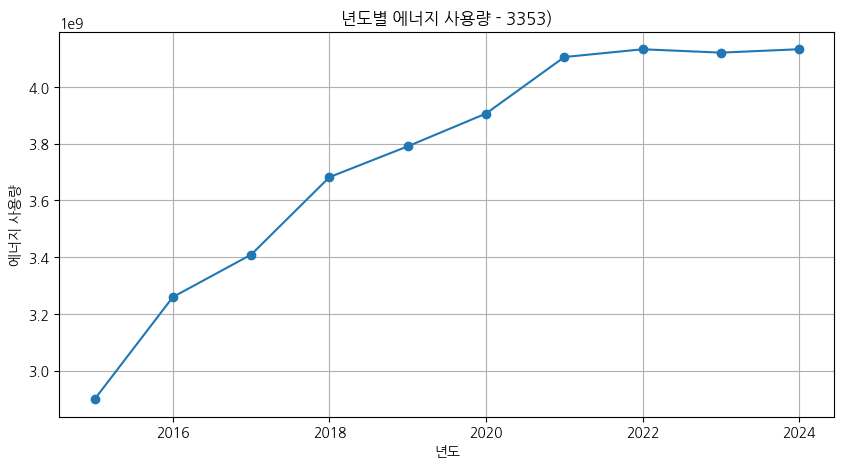

In [17]:
## 시각화 라이브러리 임포트
import matplotlib.pyplot as plt
import numpy as np

## 총 사용량 계산
df['total'] = df['EUS'] + df['GUS'] + df['WUS'] + df['HUS']

## 연도별 사용량 합
yearly_total_usage = df.groupby('year')['total'].sum()

# 선 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(yearly_total_usage.index, yearly_total_usage.values, marker='o')

## 그래프 제목과 축 이름 정하기
plt.title(f'년도별 에너지 사용량 - 3353)') # 제목을 영문으로 변경
plt.xlabel('년도') # x축 이름을 영문으로 변경
plt.ylabel('에너지 사용량') # y축 이름을 영문으로 변경
plt.grid(True)

# 그래프 저장
file_name = f'년도별 에너지 사용량 - 3353.png'
plt.savefig(file_name)


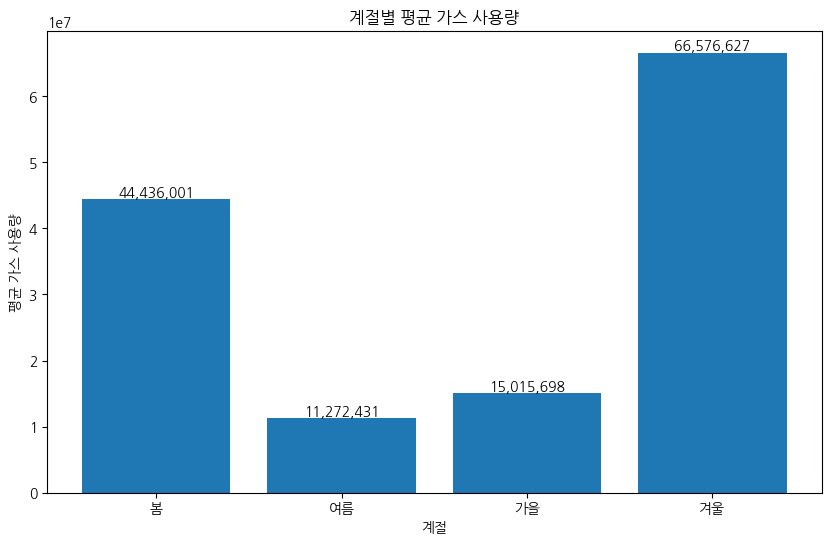


--- 계절별 가스 사용량 시각화 완료 ---
그래프를 'seasonal_gas_usage.png' 파일로 저장했습니다.


In [20]:
## 계절별 평균 가스 사용량 계산
seasonal_gas_avg = df.groupby('season')['GUS'].mean()

## 계절 순서 정렬
seasonal_gas_avg = seasonal_gas_avg.reindex(['봄', '여름', '가을', '겨울'])

## 막대 그래프 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_gas_avg.index, seasonal_gas_avg.values)

## 그래프 제목 및 축 레이블 설정
plt.title('계절별 평균 가스 사용량')
plt.xlabel('계절')
plt.ylabel('평균 가스 사용량')

## 각 막대에 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,.0f}', va='bottom', ha='center')

## 그래프 저장 및 화면에 표시
plt.savefig('계절별 평균 가스 사용량')
plt.show()
